In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
import pickle as pkl
import numpy as np
import importlib
utils.default_plot_format()
import project_utils.PatientBootstrap as PBS
utils.pd_display_settings(3)
import os

In [2]:
data_path = "processed_data/strict_outliers_2025_02_27.pkl"
result_path="sample_rate_test.pkl"

pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,VLF Power,VLF Peak Frequency,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
0,0.76,300.65,60.93,61.35,4.42,81.42,0,0,3.71,0.0267,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
1,301.46,601.06,58.91,36.23,3.90,82.09,0,0,1.84,0.03,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
2,601.74,901.43,91.85,71.25,12.10,74.51,0,0,7.00,0.0234,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
3,902.18,1202,93.23,90.24,13.39,73.35,0,0,2.37,0.02,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
4,1202,1502,51.21,33.28,10.95,69.57,0,0,4.53,0.0368,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes


In [3]:
print("time_metrics =", time_metrics)
print("frequency_metrics =", frequency_metrics)
print("non_linear_metrics =", non_linear_metrics)

time_metrics = ['SDRR', 'RMSSD', 'pNN50 (%)', 'Mean HR (bpm)']
frequency_metrics = ['VLF Power', 'LF Power', 'HF Power', 'LF÷HF Ratio']
non_linear_metrics = ['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']


# Resample mean for each condition repeatedly


In [4]:
control_id = data[~data['DPN']].id.unique()
dpn_id = data[data['DPN']].id.unique()

print(control_id, dpn_id)

['19070921' '19072205' '19072214' '19072938' '19072939' '19072940'
 '19080106' '19081506' '19082406' '19090308' '19090320' '19102102'
 '19102524' '19112609' '19121303' '19121735' '20050628' '20052606'
 '20061729' '20120922' '20121033' '20121718'] ['19101619' '20010826' '20101822' '20123017']


In [5]:

importlib.reload(PBS)
importlib.reload(PBS)

sampler = PBS.PatientBootstrap(data, file_name=result_path, n = 100000)

for metric in indicator_columns:
    sampler.sample_dpn_control(metric, dpn_id=dpn_id, control_id=control_id)

bayes_table = sampler.evaluate_bayes_metrics()

display(bayes_table.sort_values('Bayes_p', ascending=True))

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00931,-3.94,0.66,-2.57,0.16
0,pNN50 (%),0.0175,3.70,2.87,12.84,2.73
0,Mean HR (bpm),0.0386,84.36,4.88,74.92,1.97
0,SD2,0.0549,55.93,18.84,92.43,9.76
0,SDRR,0.0572,45.29,15.98,75.81,8.35
0,SD1,0.0789,28.81,13.21,51.16,7.22
0,RMSSD,0.079,40.75,18.69,72.36,10.19
0,DFA α2,0.11,1.03,0.11,0.88,0.0448
0,S,0.12,10177,8659,23096,6480
0,VLF Power,0.14,2.47,4.04,4.90,1.69


## Bootstrapped Metric Distributions
### Bootstrapped Time Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SDRR,0.0572,45.29,15.98,75.81,8.35


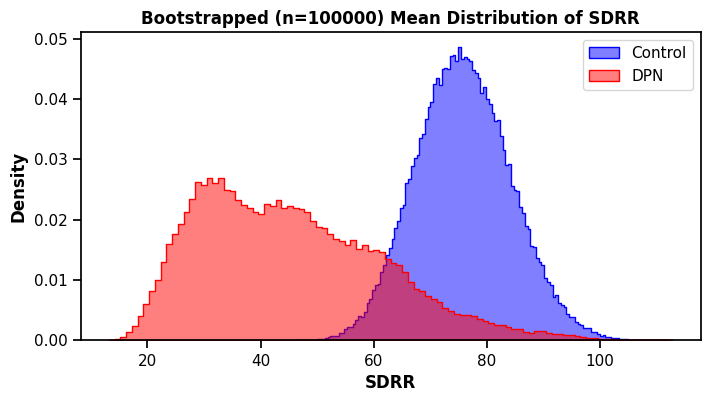

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,RMSSD,0.079,40.75,18.69,72.36,10.19


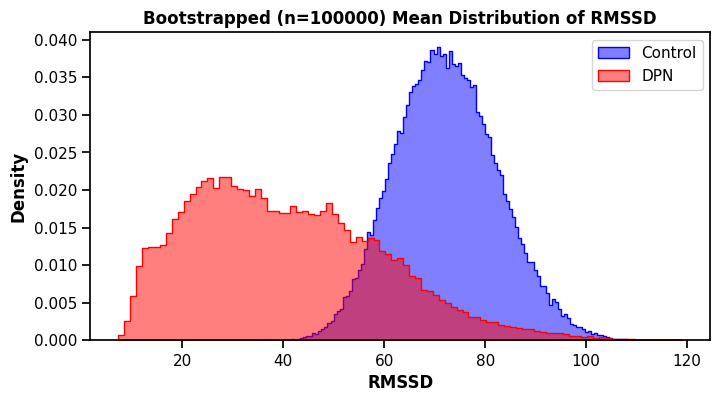

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,pNN50 (%),0.0175,3.70,2.87,12.84,2.73


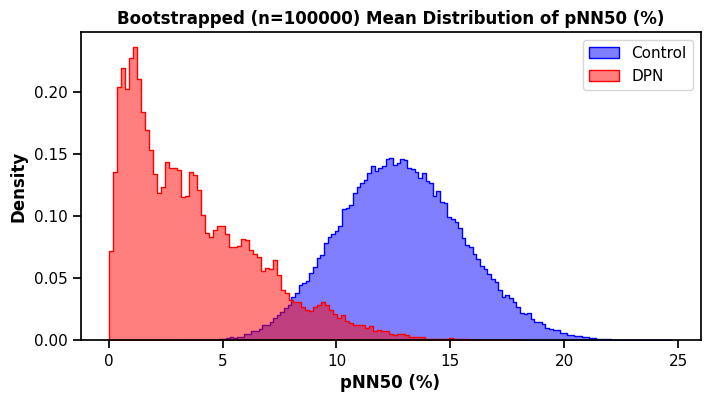

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Mean HR (bpm),0.0386,84.36,4.88,74.92,1.97


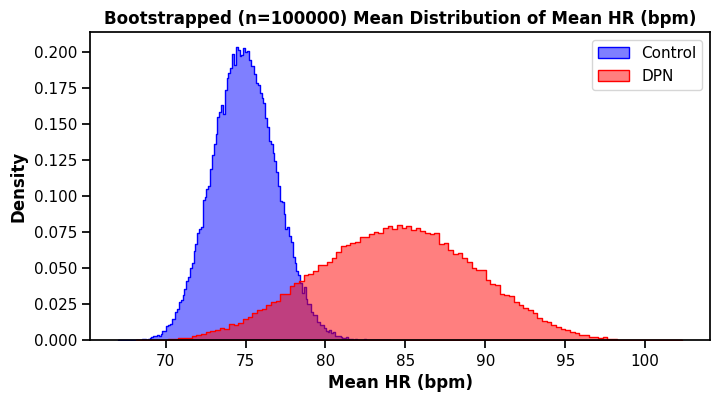

In [6]:
sampler.show_bayes_metrics(time_metrics)

### Bootstrapped Frequency Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Power,0.14,2.47,4.04,4.90,1.69


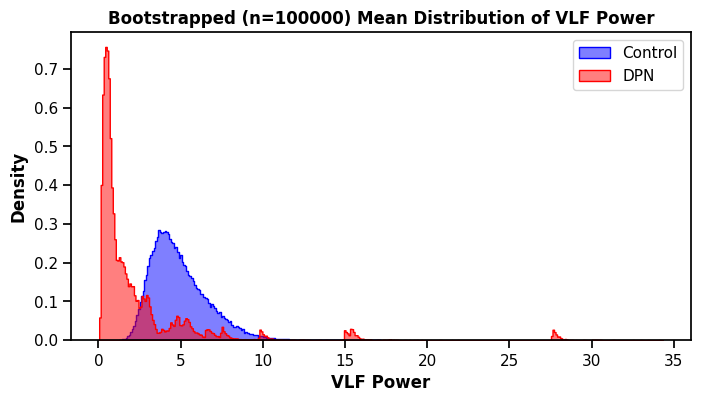

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Power,0.21,54.94,63.80,98.73,31.62


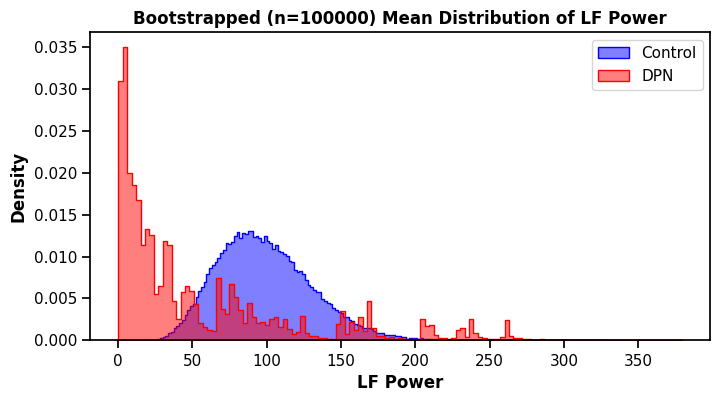

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Power,0.17,693.85,767.45,1542,519.20


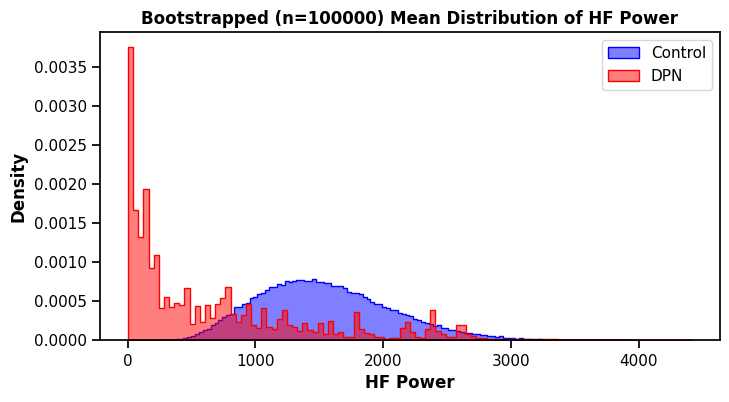

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF÷HF Ratio,0.44,0.14,0.0568,0.14,0.0303


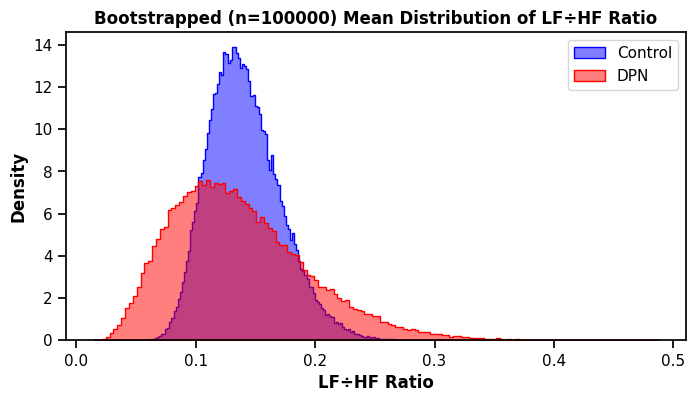

In [7]:
sampler.show_bayes_metrics(frequency_metrics)

There are significant issues with LF HF frequency calculation, as indicated by discontinuous means. 

### Bootstrapped Non Linear Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,S,0.12,10177,8659,23096,6480


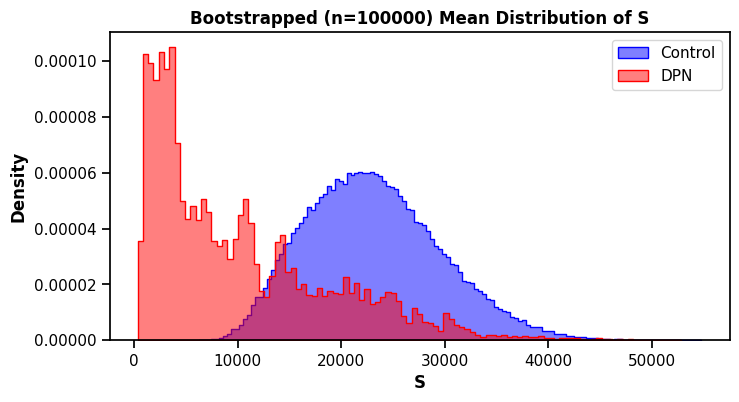

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1,0.0789,28.81,13.21,51.16,7.22


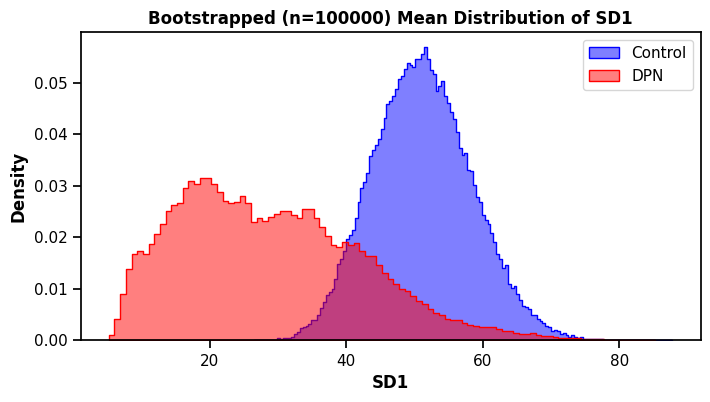

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD2,0.0549,55.93,18.84,92.43,9.76


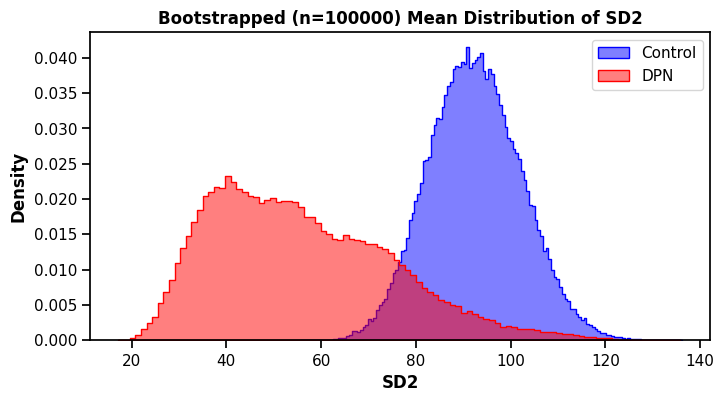

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1÷SD2,0.24,0.43,0.10,0.51,0.0407


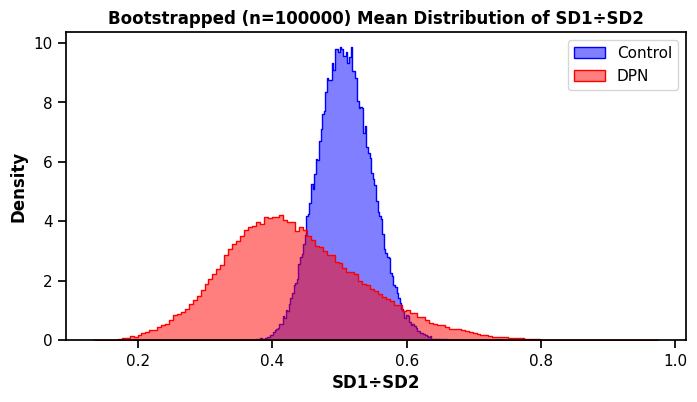

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,ApEn,0.48,0.89,0.12,0.90,0.0418


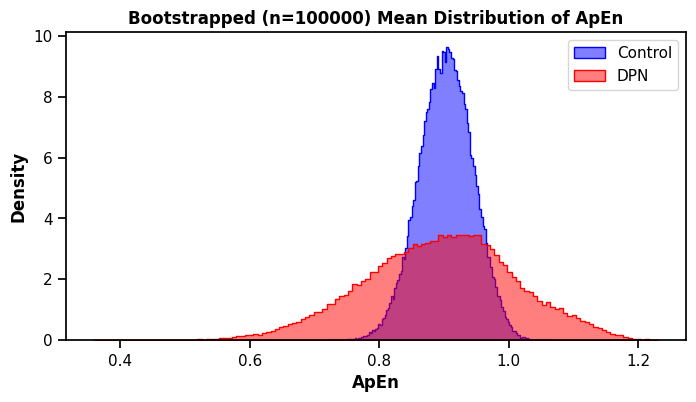

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SampEn,0.43,1.10,0.24,1.06,0.0833


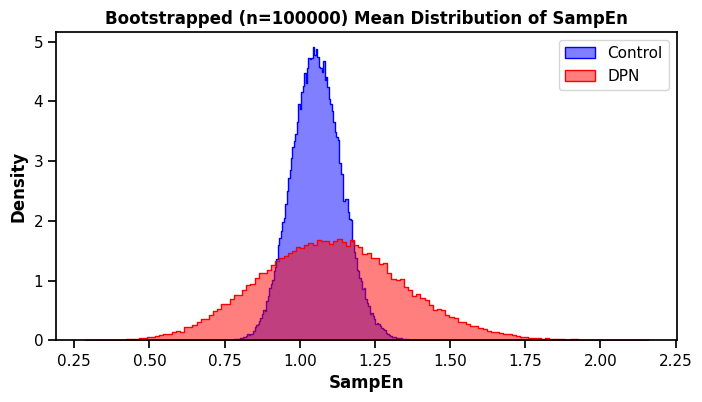

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α1,0.43,0.98,0.14,0.96,0.0502


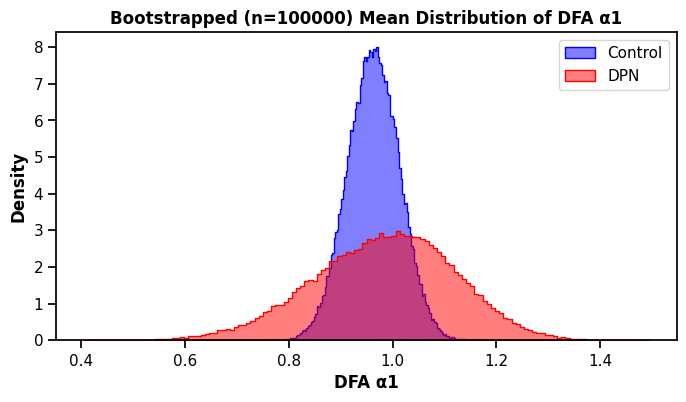

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α2,0.11,1.03,0.11,0.88,0.0448


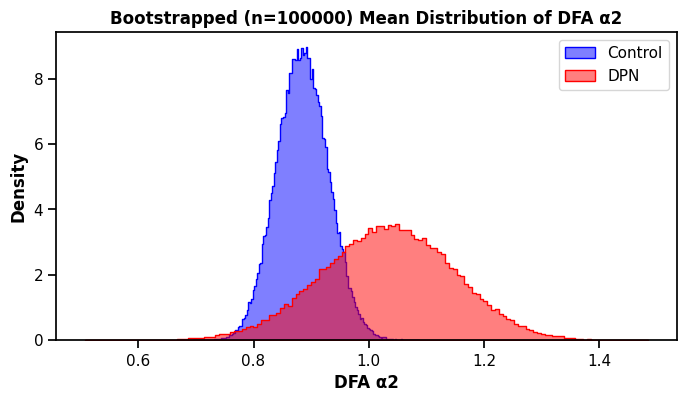

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00931,-3.94,0.66,-2.57,0.16


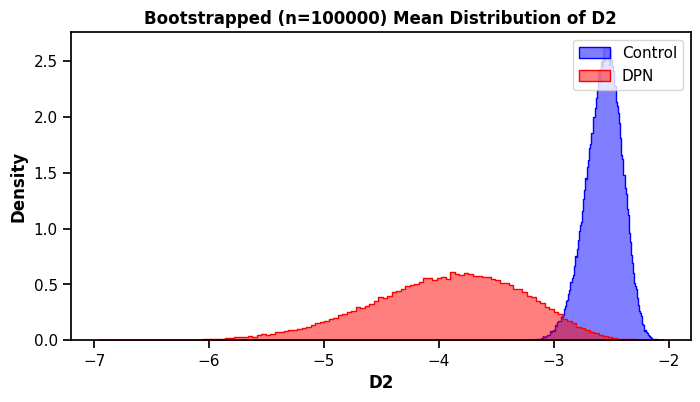

In [8]:
sampler.show_bayes_metrics(non_linear_metrics)

# Dumb classifier approach

this has yielded no good results

I have an idea that checking how suitable each value is for each population would allow me to classify the data

Construct a model that could tell how likely is each value to belong to one of the two pupulations.

Fit a gaussian model onto of each distribution.

In [9]:
from scipy.stats import norm

gaussian_dpn = {}
gaussian_controls ={}

for row in bayes_table.iterrows():
    metric = row[1]['Metric']

    dpn_mean = row[1]['DPN_Mean']
    dpn_std = row[1]['DPN_Std']
    gaussian_dpn[metric] = norm(dpn_mean, dpn_std)

    control_mean = row[1]['Control_Mean']
    control_std = row[1]['Control_Std']
    gaussian_controls[metric] = norm(control_mean, control_std)

#density = norm.pdf(x, loc=mean, scale=std)
#print("PDF at x:", density)


calculate the chances of each value belonging to the distribution

In [10]:
chances = pd.DataFrame()
for row in data.iterrows():
  
    chance_dpn = {"x_"+metric: gaussian_dpn[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_control = {"c_"+metric: gaussian_controls[metric].pdf(row[1][metric]) for metric in indicator_columns}
    
    chance_dpn = pd.Series(chance_dpn)
    chance_control = pd.Series(chance_control)

    result = {
        'DPN': row[1]['DPN'],
        'DPN_chance': chance_dpn.prod(),
        'control_chance': chance_control.prod(),
        **chance_dpn,
        **chance_control
    }


    chances = pd.concat([chances, pd.DataFrame([result])], ignore_index=True)
    
chances.describe()

,DPN_chance,control_chance,x_SDRR,x_RMSSD,x_pNN50 (%),x_Mean HR (bpm),x_VLF Power,x_VLF Peak Frequency,x_LF Power,x_LF Peak Frequency,...,c_LF÷HF Ratio,c_S,c_SD1,c_SD2,c_SD1÷SD2,c_ApEn,c_SampEn,c_DFA α1,c_DFA α2,c_D2
count,5234,5234,5234,5234,5234,5234,5234,5234,5234,5234,...,5234,5234,5234,5234,5234,5234,5234,5234,5234,5234
mean,5.95e-18,2.94e-17,0.01,0.0083,0.0575,0.0238,0.0763,39.12,0.00414,7.43,...,2.59,9.51e-06,0.00693,0.00532,1.31,1.30,0.80,1.20,1.38,0.42
std,9.38e-17,2.13e-15,0.0092,0.00739,0.0483,0.0285,0.0305,34.28,0.00194,8.61,...,4.03,1.73e-05,0.0148,0.0112,2.69,2.66,1.45,2.29,2.62,0.77
min,0,0,1.24e-61,1.33e-90,2.46e-231,5.83e-13,6.23e-156,3.24e-06,0,0.0633,...,0,0,4.87e-250,2.95e-186,2.03e-104,2.3e-72,5.82e-84,1.37e-74,3.14e-84,0
25%,1.38e-49,2.48e-172,0.000199,0.000324,0.000144,0.000203,0.0826,5.49,0.00433,0.34,...,0.0194,1.64e-07,6.98e-10,3.96e-11,2.53e-10,1.88e-09,2.61e-10,4.06e-09,4.68e-11,2.41e-09
50%,1.33e-30,1.76e-109,0.00811,0.00682,0.0604,0.00839,0.0879,28.30,0.00458,2.80,...,0.37,5.72e-07,1.46e-06,1.43e-06,0.000446,0.000682,0.000876,0.00208,0.000686,0.00115
75%,1.38e-23,1.16e-73,0.0193,0.0148,0.0957,0.0457,0.0948,74.19,0.00542,14.26,...,3.46,8.12e-06,0.00272,0.00241,0.72,0.76,0.78,1.02,1.11,0.39
max,4.28e-15,1.54e-13,0.025,0.0213,0.14,0.0817,0.0988,98.75,0.00625,25.17,...,13.18,6.16e-05,0.0552,0.0409,9.81,9.55,4.79,7.95,8.90,2.56


In [11]:
chances["shows_dpn"] = chances["DPN_chance"] > chances["control_chance"]

chances["true_positive"] = chances["shows_dpn"] & chances["DPN"]
chances["false_positive"] = chances["shows_dpn"] & ~chances["DPN"]
chances["true_negative"] = ~chances["shows_dpn"] & ~chances["DPN"]
chances["false_negative"] = ~chances["shows_dpn"] & chances["DPN"]


results = {
    "true_positive": chances["true_positive"].mean(),
    "true_negative": chances["true_negative"].mean(),
    "false_positive": chances["false_positive"].mean(),
    "false_negative": chances["false_negative"].mean()
}

print(results)


{'true_positive': 0.13431410011463507, 'true_negative': 0.033626289644631255, 'false_positive': 0.8320596102407337, 'false_negative': 0.0}


In [12]:
import pymc as pm
with pm.Model():
    dpn_metric = {}
    control_metric = {}
    for metric in sampler.memory:
        dpn_mean = np.mean(sampler.memory[metric]['DPN'])
        dpn_var = np.var(sampler.memory[metric]['DPN'])
        dpn_metric[metric] = pm.Normal(f'{metric}_dpn', mu=dpn_mean, tau=1.0/dpn_var)

        control_mean = np.mean(sampler.memory[metric]['Control'])
        control_var = np.var(sampler.memory[metric]['Control'])
        control_metric[metric] = pm.Normal(f'{metric}_control', mu=control_mean, tau=1.0/control_var)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [13]:
value = pm.logp(dpn_metric["Mean HR (bpm)"], 70).eval()
display(value)

array(-6.8264095)